In [10]:
from ase.io.espresso import read_espresso_out
from ase.io import write

# Abrir el archivo manualmente y pasarlo a ASE
with open("graphene_h_in_c.out", "r") as f:
    frames = list(read_espresso_out(f))

# Verificar si se leyeron estructuras
if not frames:
    raise ValueError("No se pudieron leer estructuras desde el archivo de salida de Quantum ESPRESSO.")

print(f"Se leyeron {len(frames)} estructuras.")

# Guardar la trayectoria en un archivo .xyz
write("graphene_h_in_c.xyz", frames)


Se leyeron 18 estructuras.


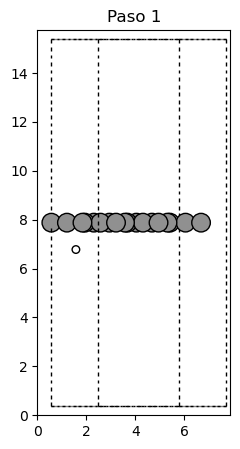

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import ase
from ase.io import read
from ase.visualize.plot import plot_atoms
import matplotlib.animation as animation

# Leer la trayectoria
frames = read("graphene_h_in_c.xyz@", index=":")

fig, ax = plt.subplots(figsize=(5, 5))

def update(i):
    ax.clear()
    plot_atoms(frames[i], ax, radii=0.5, rotation=('90x,45y'))
    ax.set_title(f"Paso {i+1}")

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=200)

# Guardar como video MP4
ani.save("graphene_h_in_c.mp4", writer="ffmpeg", fps=10)
